In [1]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

# df=pd.read_csv('household_power_consumption.txt', sep=';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])
# print('Number of rows and columns:', df.shape)
# df.head(5)

In [4]:
from numpy import nan
# mark all missing values
df.replace('?', nan, inplace=True)

In [7]:
# add a column for for the remainder of sub metering
values = df.values.astype('float32')
df['sub_metering_4'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] + values[:,6])

In [8]:
df.to_csv('household_power_consumption.csv')

In [7]:
# load the new file
df = pd.read_csv('household_power_consumption.csv')
df = df[:3000]
df.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266670
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333336
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566666
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


In [9]:
#Set Parameters
split = int(df.shape[0] * 0.9)
lag = 60
split

2700

In [10]:
training_set = df.iloc[:split, 1:2].values
test_set = df.iloc[split:, 1:2].values

In [11]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with $lag time-steps and 1 output
X_train = []
y_train = []
for i in range(lag, split):
    X_train.append(training_set_scaled[i-lag:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [12]:
model = Sequential()

#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

# # Adding a second LSTM layer and some Dropout regularisation
# model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
83/83 [==============================] - 7s 38ms/step - loss: 0.0206 - accuracy: 0.0028
Epoch 2/100
83/83 [==============================] - 3s 39ms/step - loss: 0.0099 - accuracy: 0.0023
Epoch 3/100
83/83 [==============================] - 3s 41ms/step - loss: 0.0083 - accuracy: 0.0060
Epoch 4/100
83/83 [==============================] - 3s 41ms/step - loss: 0.0089 - accuracy: 0.0025
Epoch 5/100
83/83 [==============================] - 3s 41ms/step - loss: 0.0084 - accuracy: 0.0020
Epoch 6/100
83/83 [==============================] - 3s 42ms/step - loss: 0.0085 - accuracy: 0.0024
Epoch 7/100
83/83 [==============================] - 4s 44ms/step - loss: 0.0082 - accuracy: 0.0015
Epoch 8/100
83/83 [==============================] - 3s 41ms/step - loss: 0.0076 - accuracy: 0.0061
Epoch 9/100
83/83 [==============================] - 3s 41ms/step - loss: 0.0077 - accuracy: 0.0014
Epoch 10/100
83/83 [==============================] - 3s 39ms/step - loss: 0.0078 - accuracy: 0.0015

83/83 [==============================] - 4s 44ms/step - loss: 0.0039 - accuracy: 0.0029
Epoch 81/100
83/83 [==============================] - 4s 45ms/step - loss: 0.0043 - accuracy: 0.0031
Epoch 82/100
83/83 [==============================] - 4s 42ms/step - loss: 0.0041 - accuracy: 0.0033
Epoch 83/100
83/83 [==============================] - 4s 45ms/step - loss: 0.0038 - accuracy: 0.0040
Epoch 84/100
83/83 [==============================] - 4s 43ms/step - loss: 0.0041 - accuracy: 0.0028
Epoch 85/100
83/83 [==============================] - 3s 41ms/step - loss: 0.0040 - accuracy: 0.0031
Epoch 86/100
83/83 [==============================] - 3s 40ms/step - loss: 0.0038 - accuracy: 0.0025
Epoch 87/100
83/83 [==============================] - 3s 41ms/step - loss: 0.0040 - accuracy: 0.0022
Epoch 88/100
83/83 [==============================] - 3s 41ms/step - loss: 0.0042 - accuracy: 0.0010
Epoch 89/100
83/83 [==============================] - 4s 46ms/step - loss: 0.0044 - accuracy: 0.0027
Epo

In [13]:
dataset_train = df.iloc[:split, 1:2]
dataset_test = df.iloc[split:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - lag:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(lag, df.shape[0] - split + lag):
    X_test.append(inputs[i-lag:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

(300, 60, 1)


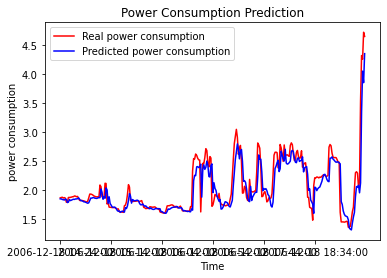

In [15]:
# Visualising the results
plt.plot(df.loc[split:, 'datetime'],dataset_test.values, color = 'red', label = 'Real power consumption')
plt.plot(df.loc[split:, 'datetime'],predicted_stock_price, color = 'blue', label = 'Predicted power consumption')
plt.xticks(np.arange(0,df.shape[0] - split,50))
plt.title('Power Consumption Prediction')
plt.xlabel('Time')
plt.ylabel('power consumption')
plt.legend()
plt.show()